In [165]:
pip install matplotlib seaborn plotly


Note: you may need to restart the kernel to use updated packages.


In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [112]:
diabetes_dataset = pd.read_csv('diabetes.csv') 

pd.read_csv

In [114]:
diabetes_dataset.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,0,33.6,0.627,50,1
1,85,66,0,26.6,0.351,31,0
2,183,64,0,23.3,0.672,32,1
3,89,66,94,28.1,0.167,21,0
4,137,40,168,43.1,2.288,33,1


In [115]:
diabetes_dataset.shape

(768, 7)

In [116]:
diabetes_dataset.describe()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [117]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [118]:
diabetes_dataset.groupby('Outcome').mean()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,
0,109.980000,68.184000,68.792000,30.304200,0.429734,31.190000
1,141.257463,70.824627,100.335821,35.142537,0.550500,37.067164


In [119]:
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [120]:
print(X)

     Glucose  BloodPressure  Insulin   BMI  DiabetesPedigreeFunction  Age
0        148             72        0  33.6                     0.627   50
1         85             66        0  26.6                     0.351   31
2        183             64        0  23.3                     0.672   32
3         89             66       94  28.1                     0.167   21
4        137             40      168  43.1                     2.288   33
..       ...            ...      ...   ...                       ...  ...
763      101             76      180  32.9                     0.171   63
764      122             70        0  36.8                     0.340   27
765      121             72      112  26.2                     0.245   30
766      126             60        0  30.1                     0.349   47
767       93             70        0  30.4                     0.315   23

[768 rows x 6 columns]


In [121]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


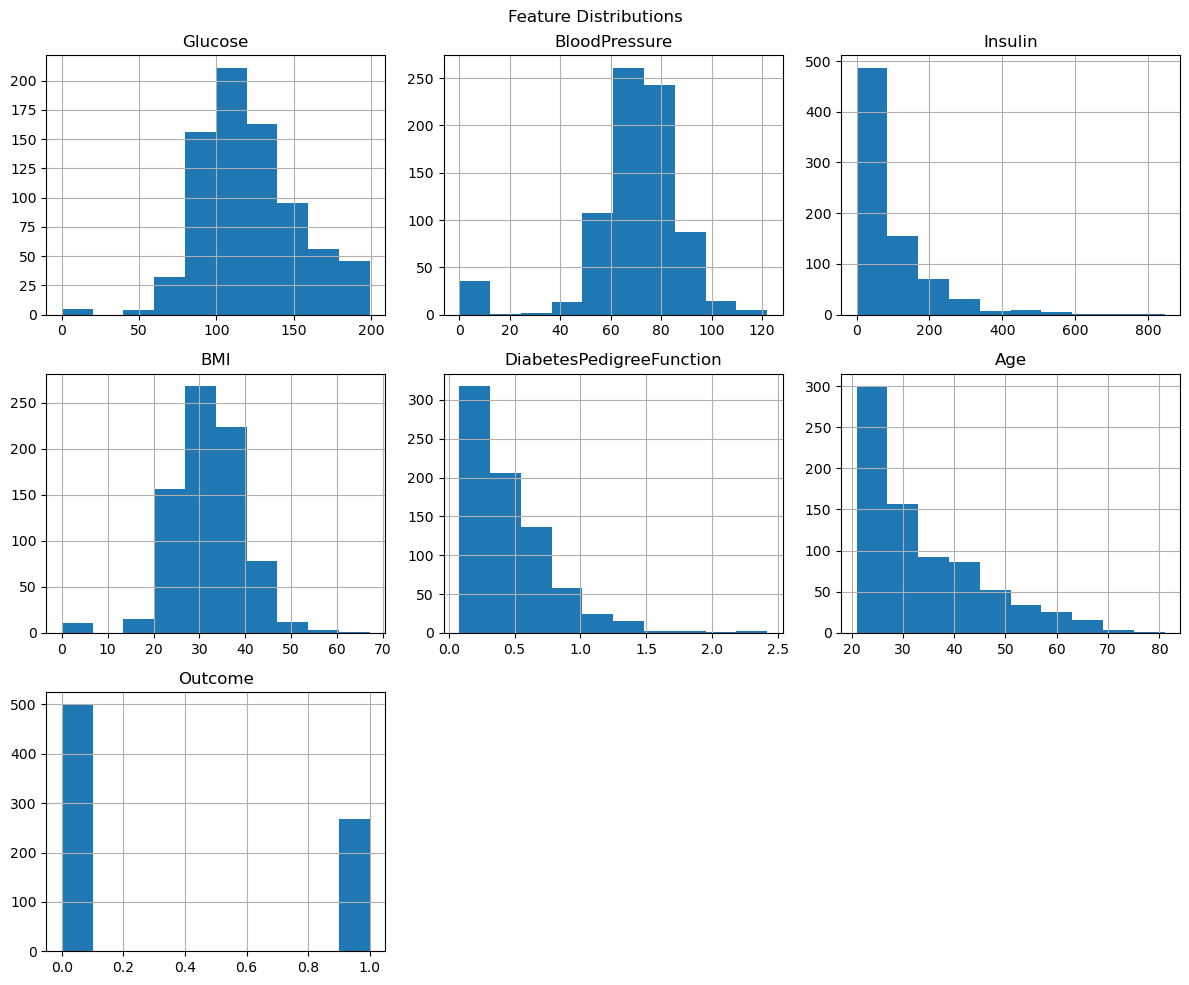

In [173]:
diabetes_dataset.hist(figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

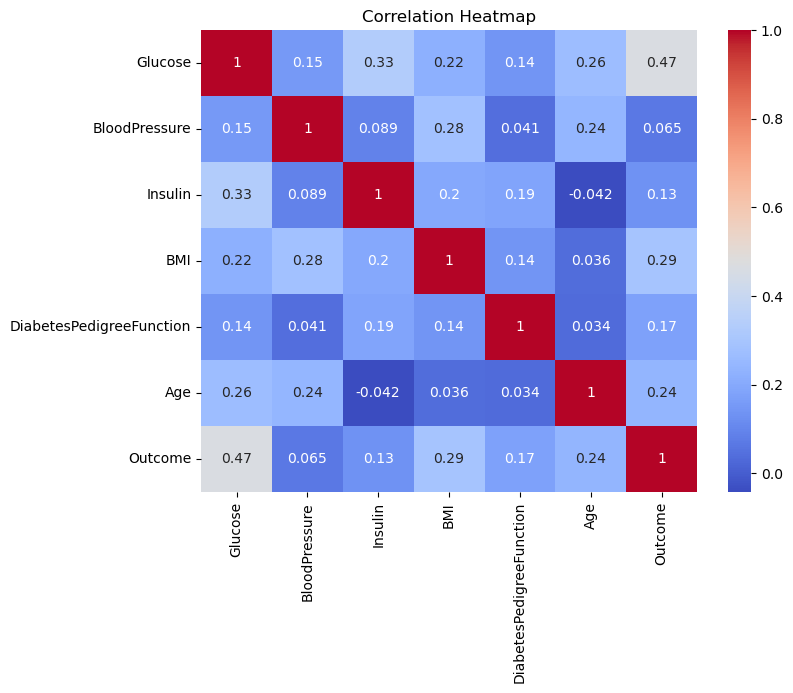

In [195]:
plt.figure(figsize=(8, 6))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

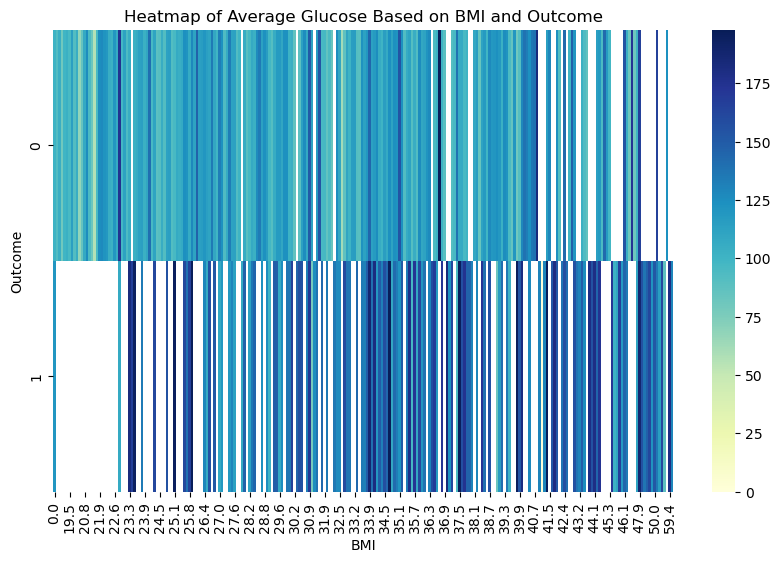

In [185]:
# Example: Visualize the average 'Glucose' values based on BMI and Outcome
pivot_table = diabetes_dataset.pivot_table(values='Glucose', index='Outcome', columns='BMI', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False)
plt.title('Heatmap of Average Glucose Based on BMI and Outcome')
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.show()


In [122]:
scaler = StandardScaler()

In [163]:
scaler.fit(X)

StandardScaler()

In [124]:
standardized_data = scaler.transform(X)

In [125]:
print(standardized_data)

[[ 0.84832379  0.14964075 -0.69289057  0.20401277  0.46849198  1.4259954 ]
 [-1.12339636 -0.16054575 -0.69289057 -0.68442195 -0.36506078 -0.19067191]
 [ 1.94372388 -0.26394125 -0.69289057 -1.10325546  0.60439732 -0.10558415]
 ...
 [ 0.00330087  0.14964075  0.27959377 -0.73518964 -0.68519336 -0.27575966]
 [ 0.1597866  -0.47073225 -0.69289057 -0.24020459 -0.37110101  1.17073215]
 [-0.8730192   0.04624525 -0.69289057 -0.20212881 -0.47378505 -0.87137393]]


In [126]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [127]:
print(X)
print(Y)

[[ 0.84832379  0.14964075 -0.69289057  0.20401277  0.46849198  1.4259954 ]
 [-1.12339636 -0.16054575 -0.69289057 -0.68442195 -0.36506078 -0.19067191]
 [ 1.94372388 -0.26394125 -0.69289057 -1.10325546  0.60439732 -0.10558415]
 ...
 [ 0.00330087  0.14964075  0.27959377 -0.73518964 -0.68519336 -0.27575966]
 [ 0.1597866  -0.47073225 -0.69289057 -0.24020459 -0.37110101  1.17073215]
 [-0.8730192   0.04624525 -0.69289057 -0.20212881 -0.47378505 -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


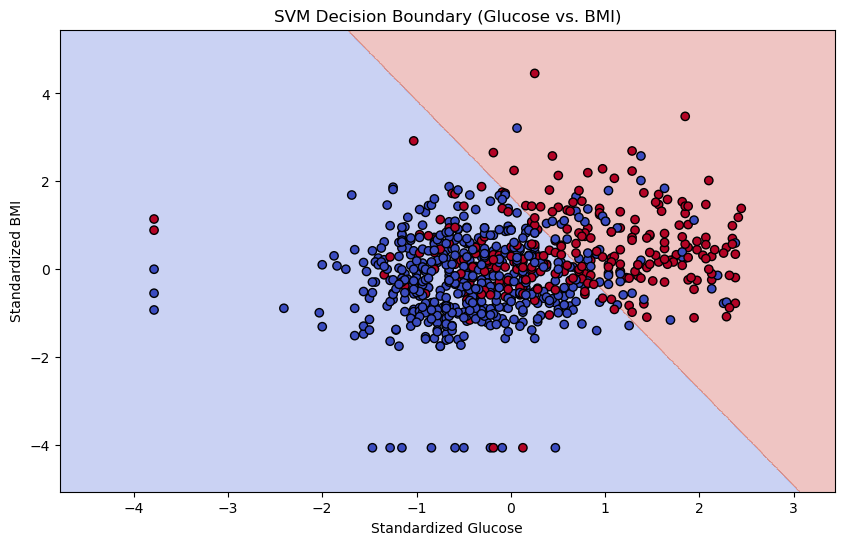

In [187]:
# Select two features for visualization (Glucose and BMI)
X_vis = diabetes_dataset[['Glucose', 'BMI']].values
Y_vis = diabetes_dataset['Outcome'].values

# Standardize the data
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)

# Train SVM classifier on selected features
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_vis_scaled, Y_vis)

# Create a meshgrid to plot the decision boundary
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the meshgrid
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=Y_vis, cmap='coolwarm', edgecolors='k')
plt.title('SVM Decision Boundary (Glucose vs. BMI)')
plt.xlabel('Standardized Glucose')
plt.ylabel('Standardized BMI')
plt.show()

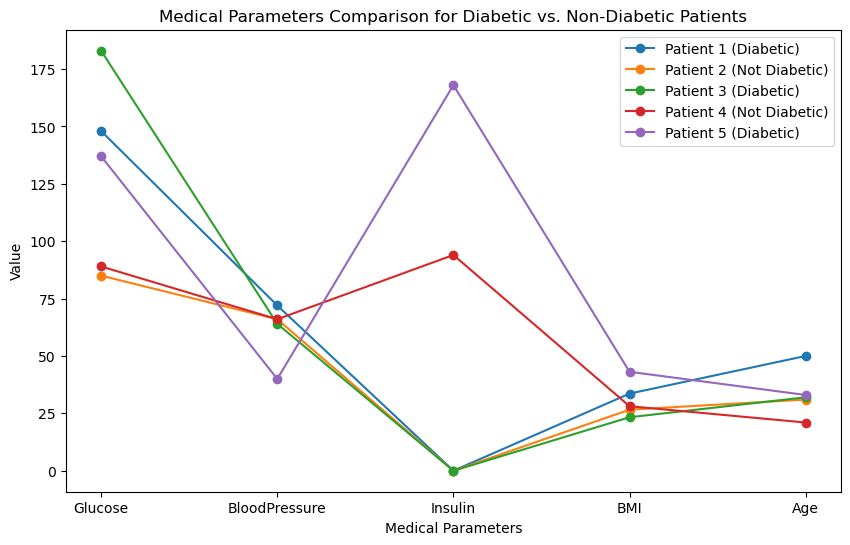

In [191]:
sample_data = diabetes_dataset.iloc[:5]  # Selecting first 5 patients
sample_data.set_index('Outcome', inplace=True)

# Prepare the data for plotting
parameters = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']
outcomes = ['Not Diabetic' if outcome == 0 else 'Diabetic' for outcome in sample_data.index]

# Transpose data for plotting purposes
transposed_data = sample_data[parameters].T

# Plot the line graph
plt.figure(figsize=(10, 6))
for i in range(transposed_data.shape[1]):
    plt.plot(parameters, transposed_data.iloc[:, i], marker='o', label=f'Patient {i+1} ({outcomes[i]})')

# Adding labels and legend
plt.title('Medical Parameters Comparison for Diabetic vs. Non-Diabetic Patients')
plt.xlabel('Medical Parameters')
plt.ylabel('Value')
plt.legend()
plt.show()

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [129]:
print(X.shape, X_train.shape, X_test.shape)

(768, 6) (614, 6) (154, 6)


In [130]:
classifier = svm.SVC(kernel='linear')

In [131]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [132]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

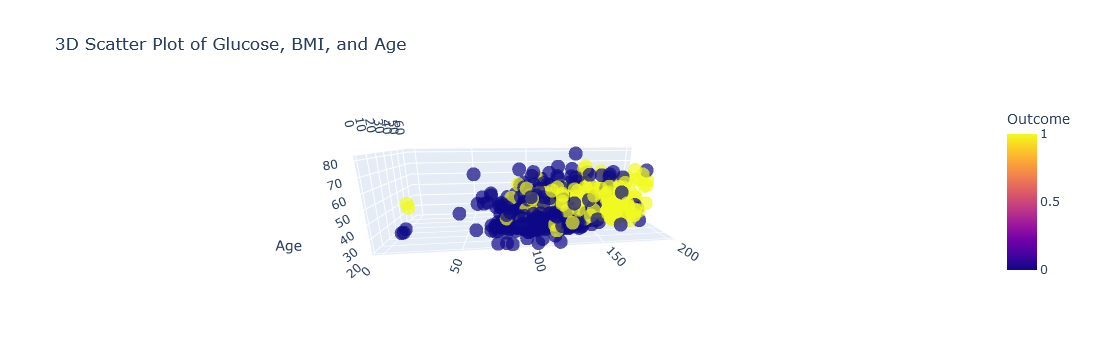

In [193]:
fig = px.scatter_3d(
    diabetes_dataset, 
    x='Glucose', 
    y='BMI', 
    z='Age',
    color='Outcome',
    title='3D Scatter Plot of Glucose, BMI, and Age',
    opacity=0.7
)
fig.show()

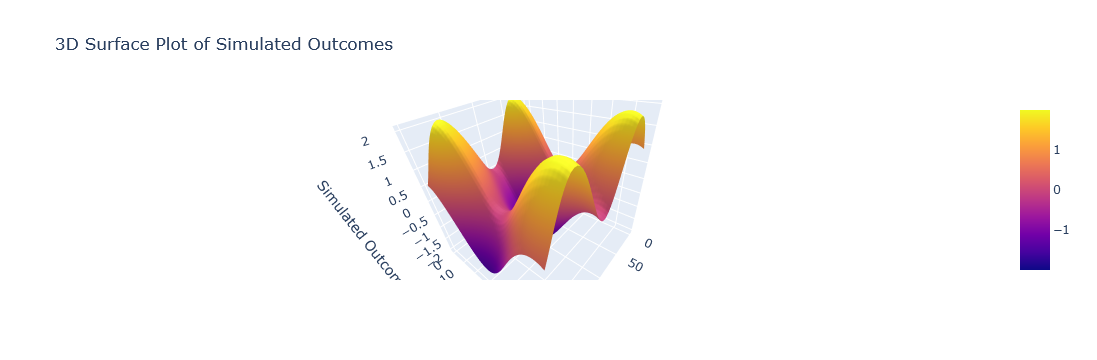

In [183]:
glucose = np.linspace(diabetes_dataset['Glucose'].min(), diabetes_dataset['Glucose'].max(), 50)
bmi = np.linspace(diabetes_dataset['BMI'].min(), diabetes_dataset['BMI'].max(), 50)
glucose, bmi = np.meshgrid(glucose, bmi)

# Simulated surface for visualization (Outcome prediction surface example)
outcome_surface = np.sin(glucose / 20) + np.cos(bmi / 10)  # Example formula

# Create the surface plot
fig = go.Figure(data=[go.Surface(z=outcome_surface, x=glucose, y=bmi)])
fig.update_layout(title='3D Surface Plot of Simulated Outcomes', scene=dict(
    xaxis_title='Glucose',
    yaxis_title='BMI',
    zaxis_title='Simulated Outcome'
))
fig.show()

In [133]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7850162866449512


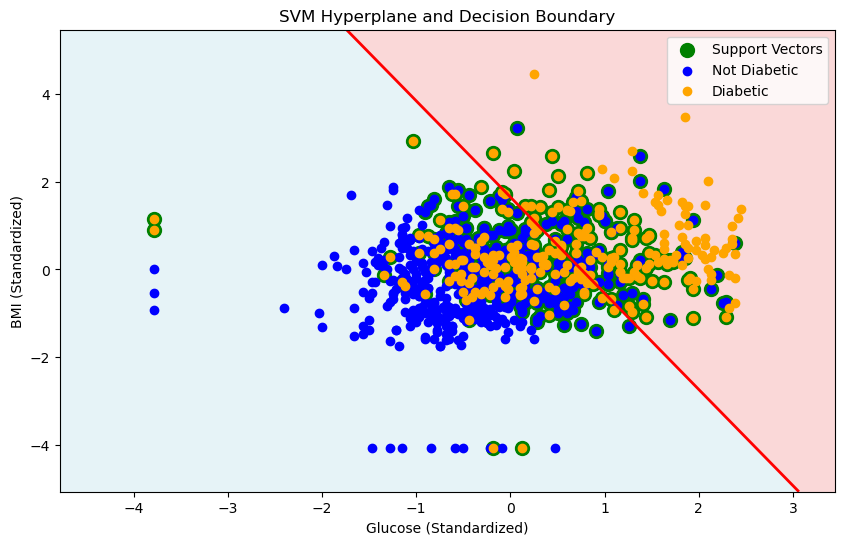

In [203]:
X = diabetes_dataset[['Glucose', 'BMI']].values
Y = diabetes_dataset['Outcome'].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train SVM classifier
classifier = SVC(kernel='linear')
classifier.fit(X, Y)

# Create a mesh grid to plot decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Predict on the mesh grid
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the hyperplane, decision boundary, and support vectors
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], colors=['lightblue', 'lightcoral'], alpha=0.3)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')  # Hyperplane (decision boundary)

# Plot the support vectors
plt.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], color='green', s=100, label='Support Vectors')

# Plot data points
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='blue', label='Not Diabetic')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='orange', label='Diabetic')

plt.xlabel('Glucose (Standardized)')
plt.ylabel('BMI (Standardized)')
plt.legend()
plt.title('SVM Hyperplane and Decision Boundary')
plt.show()

In [134]:
input_data = (166,72,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 1.41167241  0.14964075  0.82661621 -0.78595734  0.34768723  1.51108316]]
[1]
The person is diabetic


C:\Users\Shaikh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [135]:
# Assuming these are the feature names used during training
feature_names = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Convert input data to a DataFrame with the correct feature names
input_data_df = pd.DataFrame([input_data], columns=feature_names)

# Standardize the input data using the trained scaler
std_data = scaler.transform(input_data_df)

# Make the prediction
prediction = classifier.predict(std_data)

# Print the result
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')


The person is diabetic
